# AWS SaaS Sales
Pada project ini saya akan mencoba untuk menjawab pertanyaan bisnis dari data yang ada, yaitu:

**Apa faktor yang menyebabkan naik dan turunnya sales?**

**Bagaimana cara untuk meningkatkan sales?**

**Siapa saja target untuk meningkatkan sales?**

**Wilayah mana yang memiliki potensi terbaik untuk ekspansi pasar?**

Hasil akhir dari markdown ini diharapkan dapat membantu perusahaan untuk menentukan keputusan berdasarkan analisa yang telah saya buat.

Importing pandas and the dataframe

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('/content/drive/MyDrive/SaaS-Sales.csv')


In [3]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200


Cleaning and Exploring the Data

In [4]:
df.head(10)

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164
5,6,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,SaaS Connector Pack,8RM88WFOAE,48.8600,7,0.00,14.1694
6,7,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ChatBot Plugin,4SYTVM0746,7.2800,4,0.00,1.9656
7,8,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,Site Analytics,07842ES7DY,907.1520,6,0.20,90.7152
8,9,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,ContactMatcher,XPBOBXWXA3,18.5040,3,0.20,5.7825
9,10,AMER-2020-115812,6/9/2020,20200609,Thomas Hodges,United States,New York City,AMER,NAMER,BNP Paribas,1065,Finance,SMB,OneView,71J8P9Z1P0,114.9000,5,0.00,34.4700


Menghapus data yang duplikat

In [5]:
df = df.drop_duplicates()
df = df.dropna()

Memanggil semua baris di dataset yang memiliki kolom null

In [6]:
dfNull = df[df.isnull().any(axis=1)]
dfNull

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit


Dapat dilihat dataset ini termasuk dataset yang bersih karena tidak ada null di setiap cellnya.

In [7]:
df.describe()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 19 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Row ID        9994 non-null   int64  
 1   Order ID      9994 non-null   object 
 2   Order Date    9994 non-null   object 
 3   Date Key      9994 non-null   int64  
 4   Contact Name  9994 non-null   object 
 5   Country       9994 non-null   object 
 6   City          9994 non-null   object 
 7   Region        9994 non-null   object 
 8   Subregion     9994 non-null   object 
 9   Customer      9994 non-null   object 
 10  Customer ID   9994 non-null   int64  
 11  Industry      9994 non-null   object 
 12  Segment       9994 non-null   object 
 13  Product       9994 non-null   object 
 14  License       9994 non-null   object 
 15  Sales         9994 non-null   float64
 16  Quantity      9994 non-null   int64  
 17  Discount      9994 non-null   float64
 18  Profit        9994 non-null 

In [8]:
df['Year'] = df['Date Key'].astype(str).str[:4]

In [9]:
df

,Row ID,Order ID,Order Date,Date Key,Contact Name,Country,City,Region,Subregion,Customer,Customer ID,Industry,Segment,Product,License,Sales,Quantity,Discount,Profit,Year
0,1,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,Marketing Suite,16GRM07R1K,261.9600,2,0.00,41.9136,2022
1,2,EMEA-2022-152156,11/9/2022,20221109,Nathan Bell,Ireland,Dublin,EMEA,UKIR,Chevron,1017,Energy,SMB,FinanceHub,QLIW57KZUV,731.9400,3,0.00,219.5820,2022
2,3,AMER-2022-138688,6/13/2022,20220613,Deirdre Bailey,United States,New York City,AMER,NAMER,Phillips 66,1056,Energy,Strategic,FinanceHub,JI6BVL70HQ,14.6200,2,0.00,6.8714,2022
3,4,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,ContactMatcher,DE9GJKGD44,957.5775,5,0.45,-383.0310,2021
4,5,EMEA-2021-108966,10/11/2021,20211011,Zoe Hodges,Germany,Stuttgart,EMEA,EU-WEST,Royal Dutch Shell,1031,Energy,SMB,Marketing Suite - Gold,OIF7NY23WD,22.3680,2,0.20,2.5164,2021
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9989,9990,EMEA-2020-110422,1/22/2020,20200122,Dan Allan,Germany,Hamburg,EMEA,EU-WEST,Johnson & Johnson,1055,Healthcare,SMB,SaaS Connector Pack,ETHXMB5TMD,25.2480,3,0.20,4.1028,2020
9990,9991,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,SaaS Connector Pack,LYHOKTRY7L,91.9600,2,0.00,15.6332,2023
9991,9992,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Site Analytics,I5SVMI6M88,258.5760,2,0.20,19.3932,2023
9992,9993,AMER-2023-121258,2/27/2023,20230227,Anthony Sanderson,United States,Milwaukee,AMER,NAMER,American Express,1005,Finance,SMB,Support,JHLW4P6LQ2,29.6000,4,0.00,13.3200,2023


Exploring the Data

Melihat Industri mana yang paling banyak menggunakan AWS SaaS.

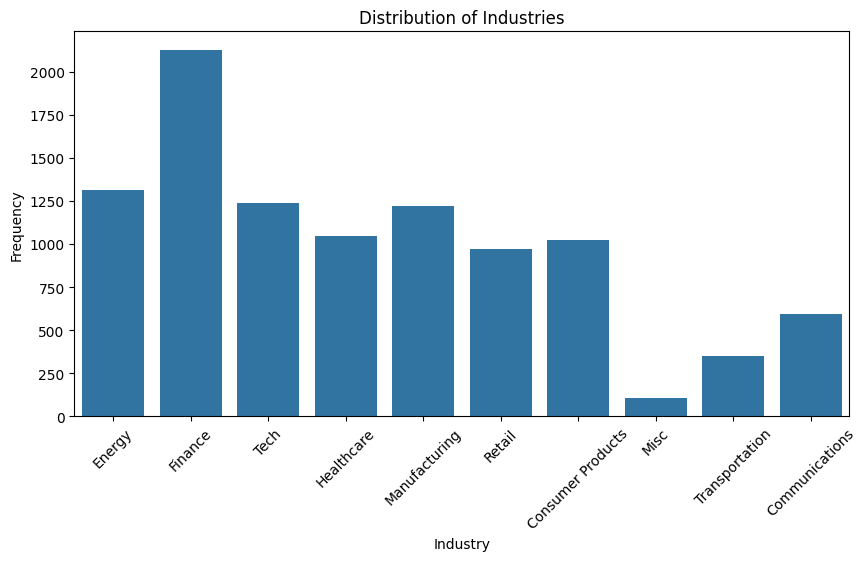

In [10]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Industry'])
plt.xticks(rotation=45)
plt.title('Distribution of Industries')
plt.xlabel('Industry')
plt.ylabel('Frequency')
plt.show()

Melihat produk apa yang paling banyak dibeli oleh customer.

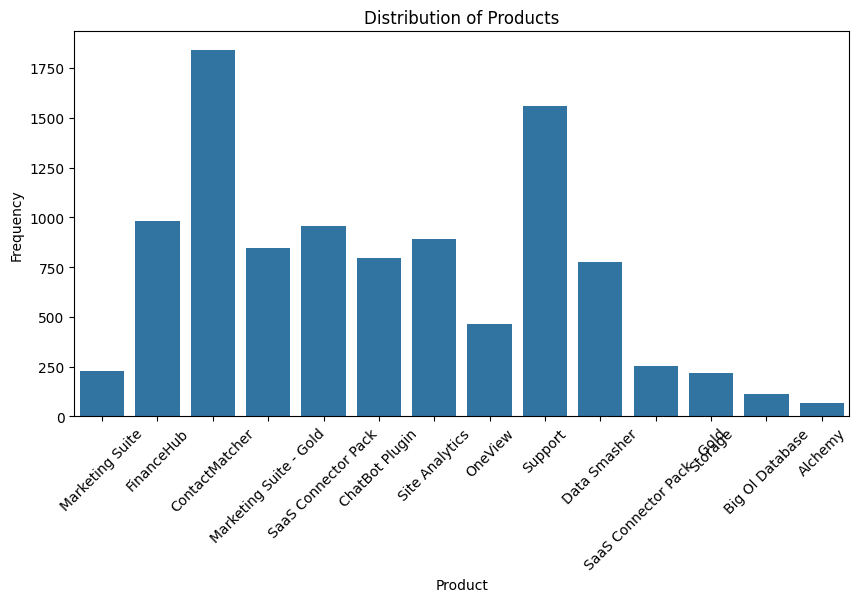

In [11]:
plt.figure(figsize=(10, 5))
sns.countplot(x=df['Product'])
plt.xticks(rotation=45)
plt.title('Distribution of Products')
plt.xlabel('Product')
plt.ylabel('Frequency')
plt.show()

Melihat total sales dan profit dari tiap quarter per tahun

<ipython-input-12-7d5c5010edab>:21: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


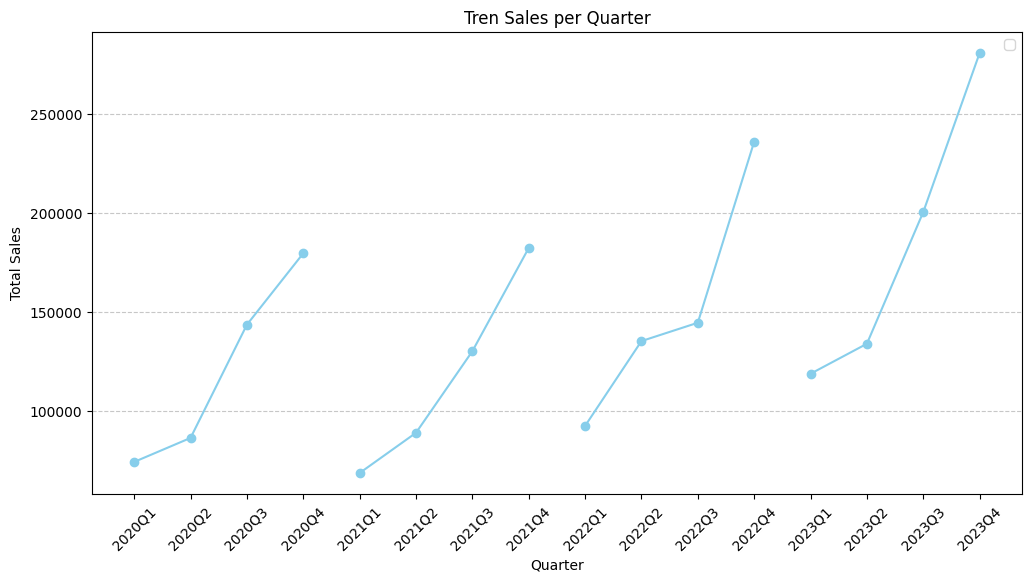

In [12]:
# jika terjadi error gunakan ini --> df = df.reset_index()

df['Order Date'] = pd.to_datetime(df['Order Date'])

df['Quarter'] = df['Order Date'].dt.to_period('Q')

df_grouped = df.groupby(['Year', 'Quarter'])['Sales'].sum().reset_index()

# Konversi Quarter ke format string untuk pemetaan lebih mudah
df_grouped['Quarter'] = df_grouped['Quarter'].astype(str)

# Dataa Vizz
plt.figure(figsize=(12, 6))
for year in df_grouped['Year'].unique():
    data = df_grouped[df_grouped['Year'] == year]
    plt.plot(data['Quarter'], data['Sales'], marker='o', linestyle = '-', color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Total Sales')
plt.title('Tren Sales per Quarter')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-14-00eff4e2077f>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


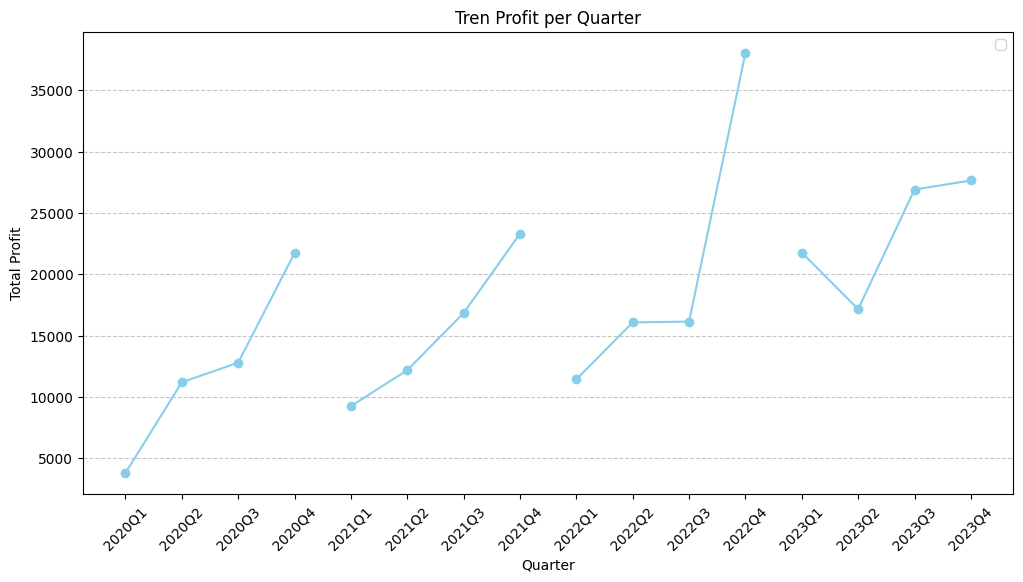

In [14]:
df_grouped = df.groupby(['Year', 'Quarter'])['Profit'].sum().reset_index()

df_grouped['Quarter'] = df_grouped['Quarter'].astype(str)
#vizzz
plt.figure(figsize=(12, 6))
for year in df_grouped['Year'].unique():
    data = df_grouped[df_grouped['Year'] == year]
    plt.plot(data['Quarter'], data['Profit'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Total Profit')
plt.title('Tren Profit per Quarter')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

<ipython-input-15-50c912e0b64e>:13: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


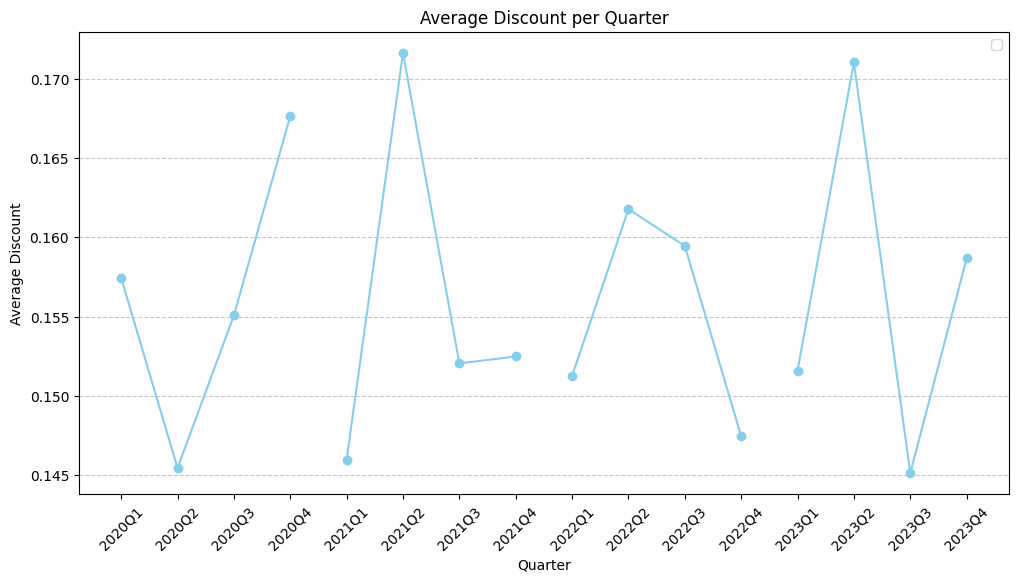

In [15]:
df_grouped = df.groupby(['Year', 'Quarter'])['Discount'].mean().reset_index()

df_grouped['Quarter'] = df_grouped['Quarter'].astype(str)
#vizz
plt.figure(figsize=(12, 6))
for year in df_grouped['Year'].unique():
    data = df_grouped[df_grouped['Year'] == year]
    plt.plot(data['Quarter'], data['Discount'], marker='o', linestyle='-', color='skyblue')

plt.xlabel('Quarter')
plt.ylabel('Average Discount')
plt.title('Average Discount per Quarter')
plt.legend()
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Dapat dilihat bahwa pada setiap Q1 dari rentang tahun 2020 sampai dengan 2023 terdapat penurunan jumlah Sales dan Profit dan itu berpengaruh mungkin dari subcription yang sistemnya adalah tahunan.

# Analyzing the Data

Dari eksplorasi data diatas didapat bahwa setiap awal quarter di setiap tahun terjadi penurunan sales dan profit dimana itu juga ada impactnya dari diskon. Dimana rata-rata diskon juga turun di tiap awal quarter di setiap tahun. Maka dari itu saya menyarankan untuk juga melakukan ekspansi pasar dimana itu diharapkan akan meningkatkan sales juga.


Disini sekarang akan mencari potensi dimana sub-region yang memiliki sales yang tidak rendah dan tidak juga tinggi.

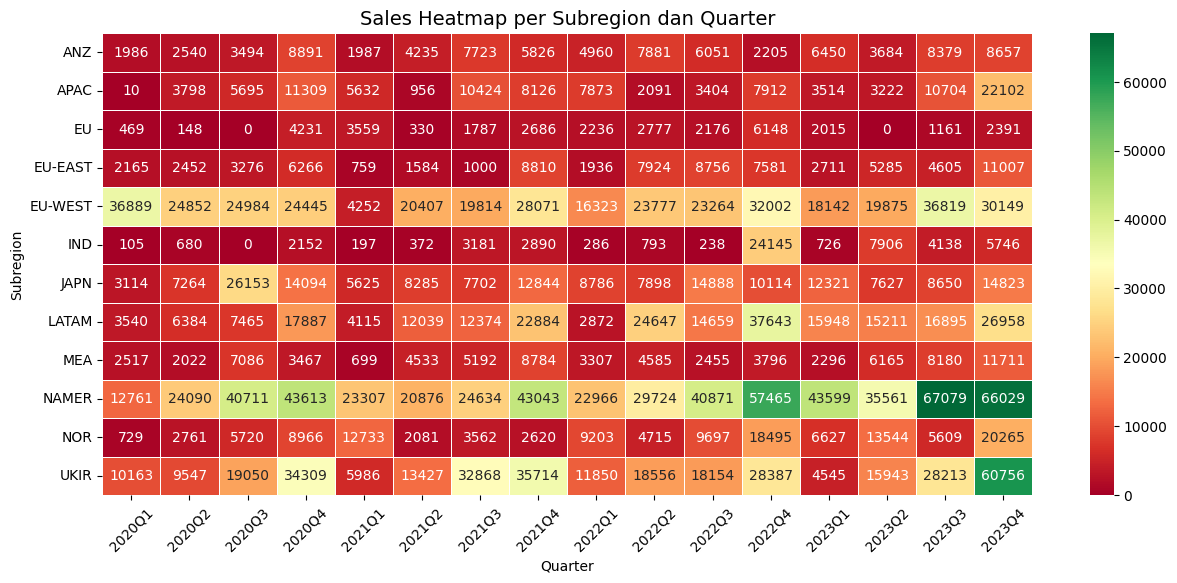

In [16]:
df["Order Date"] = pd.to_datetime(df["Order Date"])  # Konversi ke format datetime
df["Year"] = df["Order Date"].dt.year  # Ambil tahun
df["Quarter"] = df["Order Date"].dt.to_period("Q")  # Ambil kuartal (contoh: 2022Q3)

salesPivot = df.pivot_table(values="Sales", index="Subregion", columns="Quarter", aggfunc="sum").fillna(0)


plt.figure(figsize=(15, 6))
sns.heatmap(salesPivot, cmap="RdYlGn", annot=True, fmt=".0f", linewidths=0.5)

plt.title("Sales Heatmap per Subregion dan Quarter", fontsize=14)
plt.xlabel("Quarter")
plt.ylabel("Subregion")
plt.xticks(rotation=45)
plt.show()

Berdasarkan visualisasi data diatas, dapat dilihat jika dari warna kuning dimana disekitar average dari sum total sales tiap sub region, dimana pasar itu tidak terlalu terpapar oleh promosi yang disediakan oleh salesperson kita, maka dari itu daerah yang memiliki warna kuning hingga hijau sangat direkomendasikan untuk dilakukan ekspansi pasar.